In [1]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## HOMICIDIOS: lectura de archivos CSV

In [3]:
df_hom = pd.read_csv('data\df_homicidios.csv')
df_hom_vic = pd.read_csv('data\df_vic_hom.csv')

# nos concentramos en "df_hom" 

In [4]:
# Convertimos el tipo de datos de la columna 'HORA'

df_hom['HORA'] = df_hom['HORA'].fillna(0).astype('int')

# cambiamos a formato categórico
df_hom['TIPO_DE_CALLE'] = df_hom['TIPO_DE_CALLE'].astype('category')
df_hom['COMUNA'] = df_hom['COMUNA'].astype('category')
df_hom['VEHICULO_ACUSADO'] = df_hom['VEHICULO_ACUSADO'].astype('category')

# Fecha
df_hom['FECHA'] = df_hom['FECHA'].astype('datetime64[ns]')


# Cambiamos a tipo de datos float para las columnas 'LATITUD' y 'LONGITUD'
df_hom['LONGITUD'] = df_hom['LONGITUD'].astype('float')
df_hom['LATITUD'] = df_hom['LATITUD'].astype('float')

df_hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          696 non-null    object        
 1   N_VICTIMAS        696 non-null    int64         
 2   FECHA             696 non-null    datetime64[ns]
 3   HORA              696 non-null    int32         
 4   TIPO_DE_CALLE     696 non-null    category      
 5   COMUNA            696 non-null    category      
 6   XY (CABA)         682 non-null    object        
 7   LONGITUD          684 non-null    float64       
 8   LATITUD           684 non-null    float64       
 9   VEHICULO_ACUSADO  673 non-null    category      
 10  GRAVEDAD          696 non-null    object        
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 44.2+ KB


## Gráficos de las Variables


In [4]:
# Definimos las columnas para generar gráficos
columnas1=["TIPO_DE_CALLE","COMUNA","VEHICULO_ACUSADO","N_VICTIMAS"]

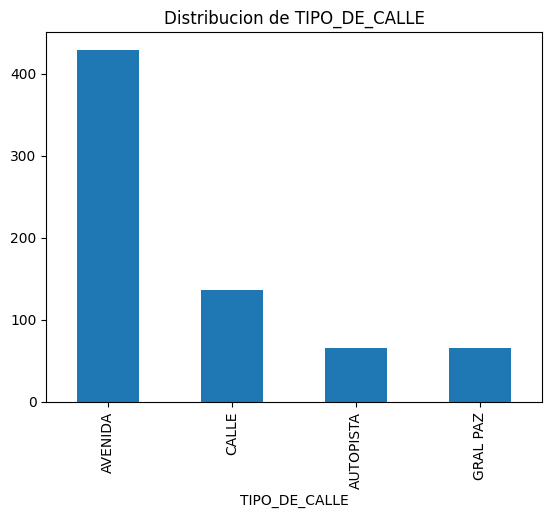

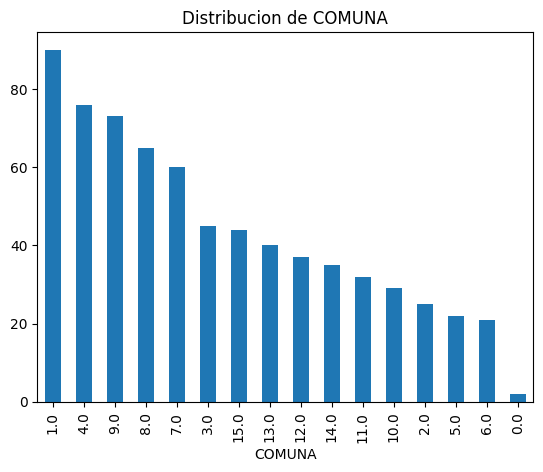

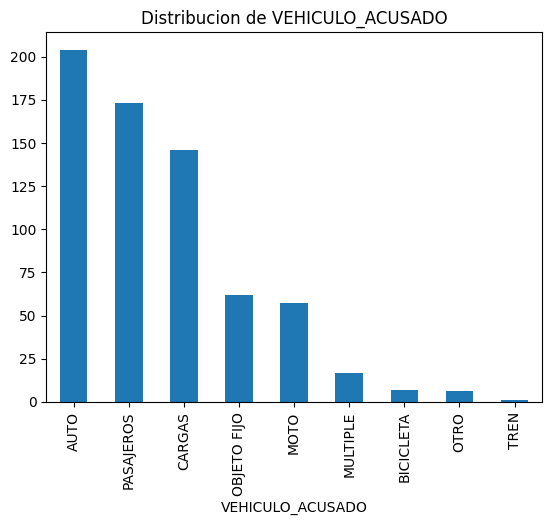

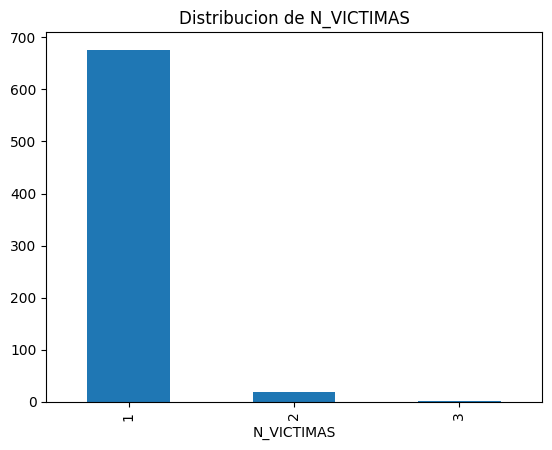

In [5]:
# Observamos las frecuencias de los datos categóricos de la primera tabla del DataFrame
for col in columnas1:
    df_hom[col].value_counts().plot(kind='bar',title="Distribucion de "+str(col),)
    plt.show()

## Subplots 

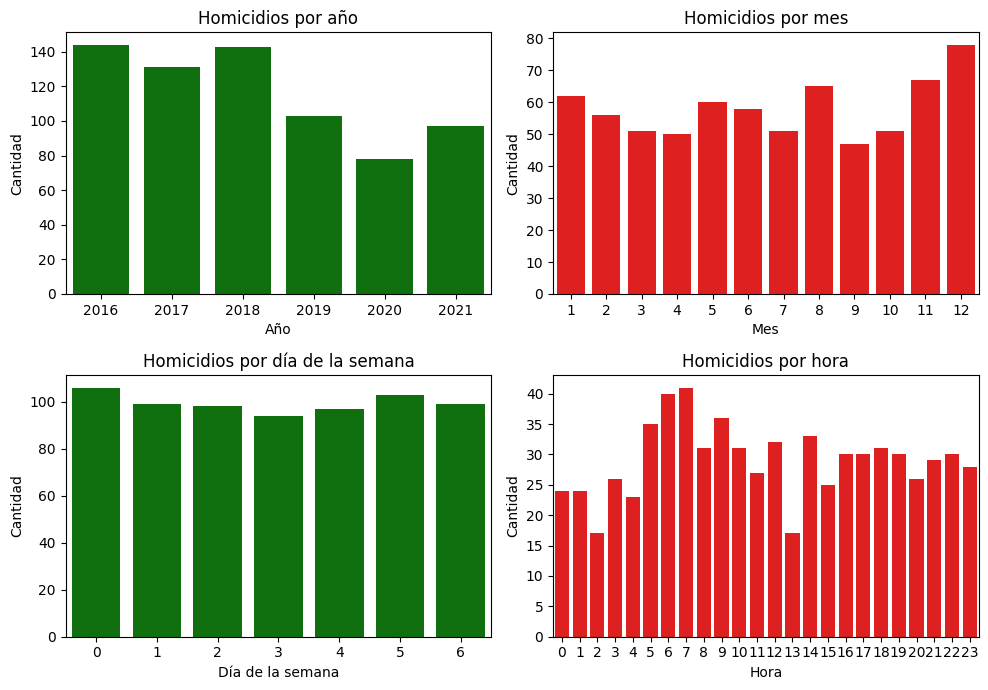

In [7]:
# SUBPLOTS DE LOS AÑOS, MESES, DIAS Y HORAS DE LOS HOMICIDIOS

# Creamos el gráfico
plt.figure(figsize=(10, 7))

# Subplot 1: Count plot para los meses de la columna FECHA
plt.subplot(2, 2, 1)  
sns.countplot(x=df_hom['FECHA'].dt.year,color="green")
plt.title('Homicidios por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

# Subplot 2: Count plot para los días de la semana de la columna FECHA
plt.subplot(2, 2, 2)  
sns.countplot(x=df_hom['FECHA'].dt.month,color="red" )
plt.title('Homicidios por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

# Subplot 3: Count plot para las horas de la columna HORA
plt.subplot(2, 2, 3)  
sns.countplot(x=df_hom['FECHA'].dt.dayofweek,color="green")
plt.title('Homicidios por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# Subplot 4: Count plot para los años de la columna FECHA
plt.subplot(2, 2, 4)  
sns.countplot(x=df_hom['HORA'],color="red")
plt.title('Homicidios por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')

# Ajustamos el espacio entre los subplots
plt.tight_layout()

# Mostramos el gráfico
plt.show()

## Nos concentramos en "df_hom_vic" 

In [8]:
# cambiamos de formato a las columnas del df_hom_vic
df_hom_vic['FECHA'] = df_hom_vic['FECHA'].astype('datetime64[ns]')
df_hom_vic['ROL_VICTIMA'] = df_hom_vic['ROL_VICTIMA'].astype('category')
df_hom_vic['SEXO_VICTIMA'] = df_hom_vic['SEXO_VICTIMA'].astype('category')
df_hom_vic['RANGO_ETARIO'] = df_hom_vic['RANGO_ETARIO'].astype('category')
#cambiamos nombre la columna edad
#df_hom_vic.rename(columns={"EDAD":"EDAD_VICTIMA"},inplace=True)

In [9]:
df_hom_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          717 non-null    object        
 1   FECHA             717 non-null    datetime64[ns]
 2   ROL_VICTIMA       706 non-null    category      
 3   VEHICULO_VICTIMA  708 non-null    object        
 4   SEXO_VICTIMA      711 non-null    category      
 5   EDAD_VICTIMA      664 non-null    float64       
 6   GRAVEDAD          717 non-null    object        
 7   RANGO_ETARIO      664 non-null    category      
dtypes: category(3), datetime64[ns](1), float64(1), object(3)
memory usage: 30.8+ KB


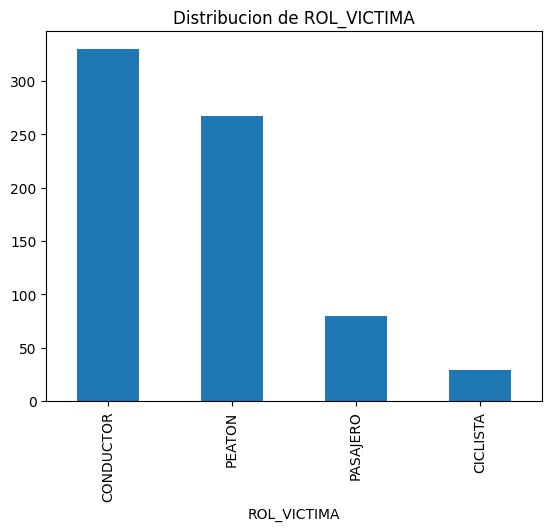

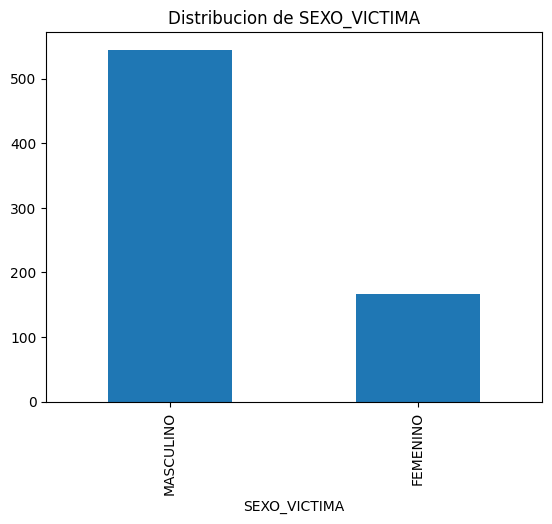

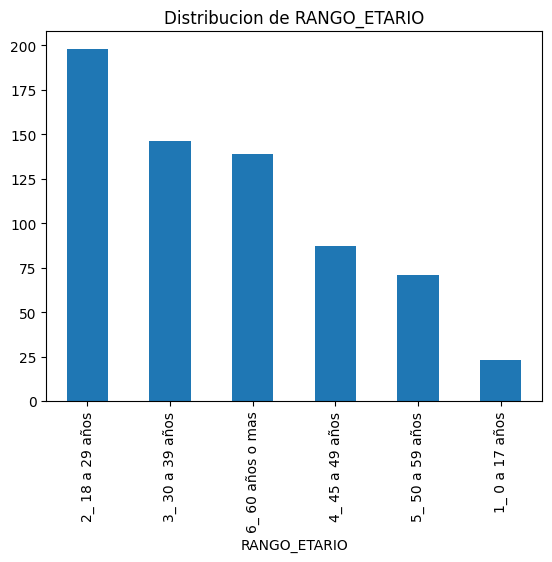

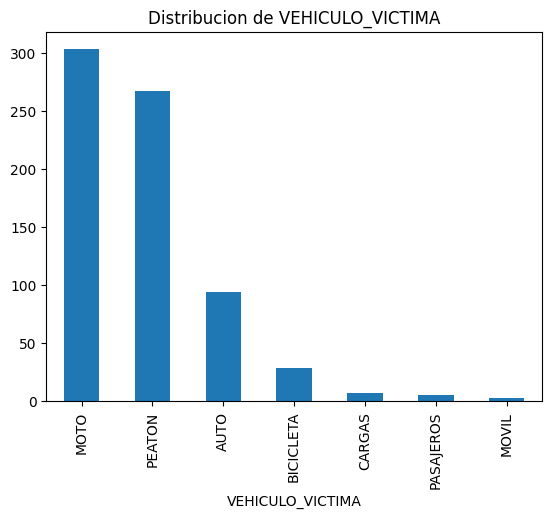

In [10]:
columnas2=["ROL_VICTIMA","SEXO_VICTIMA","RANGO_ETARIO","VEHICULO_VICTIMA"]

# Observamos las frecuencias de los datos categóricos de la primera tabla df_hom_vic
for col in columnas2:
    df_hom_vic[col].value_counts().plot(kind='bar',title="Distribucion de "+str(col))
    plt.show()

In [11]:
df_hom_vic.columns

Index(['ID_HECHO', 'FECHA', 'ROL_VICTIMA', 'VEHICULO_VICTIMA', 'SEXO_VICTIMA',
       'EDAD_VICTIMA', 'GRAVEDAD', 'RANGO_ETARIO'],
      dtype='object')

## LESIONES: lectura de archivos

In [12]:
df_les = pd.read_csv('data\df_lesiones.csv')
df_les_vic = pd.read_csv('data\df_vic_les.csv')

## Nos concentramos en "df_lesiones"

In [13]:
# Cambiamos de tipo de datos a la columna 'HORA'
df_les['HORA'] = df_les['HORA'].fillna(0).astype('int')

# cambio a formato categórico
df_les['TIPO_DE_CALLE'] = df_les['TIPO_DE_CALLE'].astype('category')
df_les['COMUNA'] = df_les['COMUNA'].astype('category')
df_les['VEHICULO_ACUSADO'] = df_les['VEHICULO_ACUSADO'].astype('category')

# FECHA
df_les['FECHA'] = df_les['FECHA'].astype('datetime64[ns]')

df_les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          23785 non-null  object        
 1   N_VICTIMAS        23785 non-null  int64         
 2   FECHA             23785 non-null  datetime64[ns]
 3   HORA              23785 non-null  int32         
 4   COMUNA            22328 non-null  category      
 5   TIPO_DE_CALLE     12740 non-null  category      
 6   XY (CABA)         22533 non-null  object        
 7   LONGITUD          22314 non-null  float64       
 8   LATUTID           22314 non-null  float64       
 9   VEHICULO_ACUSADO  8497 non-null   category      
 10  GRAVEDAD          23785 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 1.4+ MB


## Gráficos de las variables

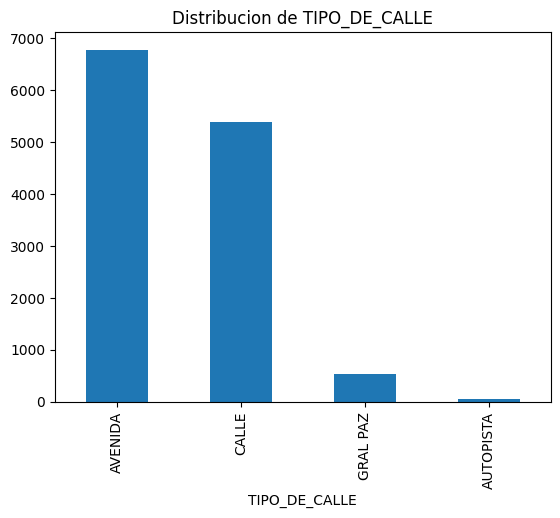

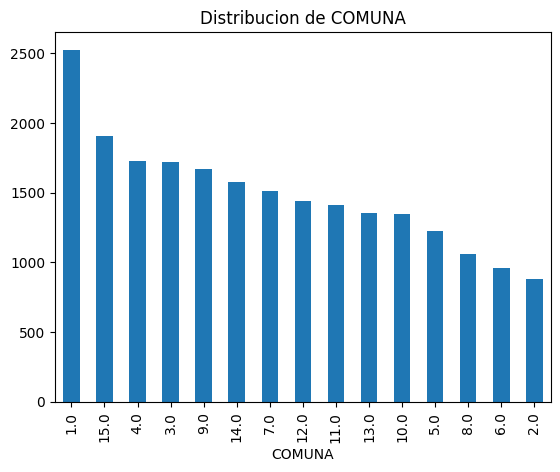

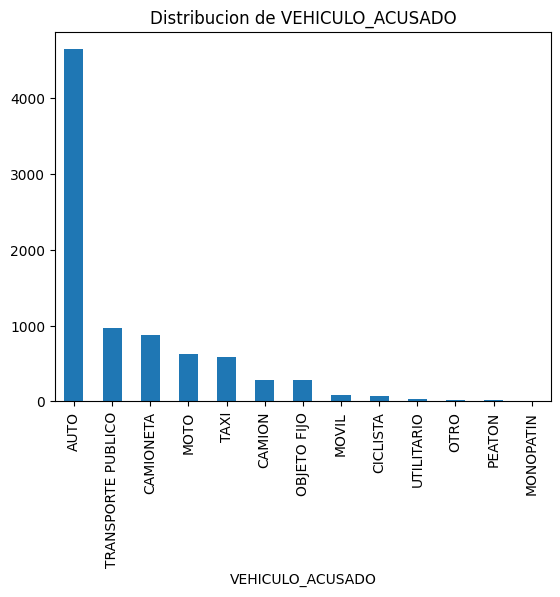

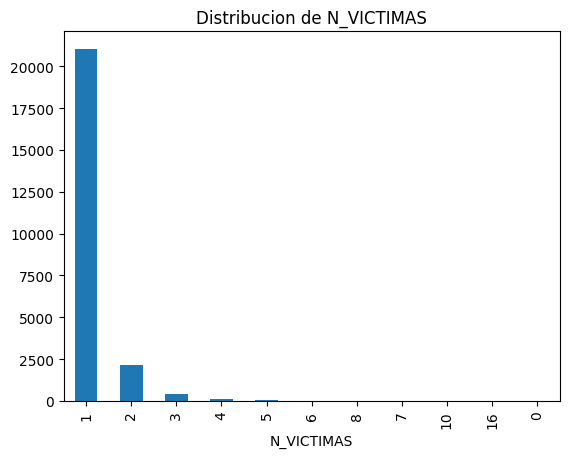

In [14]:
# Definimos las columnas para generar gráficos
columnas2=["TIPO_DE_CALLE","COMUNA","VEHICULO_ACUSADO","N_VICTIMAS"]
# Observamos las frecuencias de los datos categóricos de la primera tabla df_lesiones
for col in columnas2:
    df_les[col].value_counts().plot(kind='bar',title="Distribucion de "+str(col))
    plt.show()

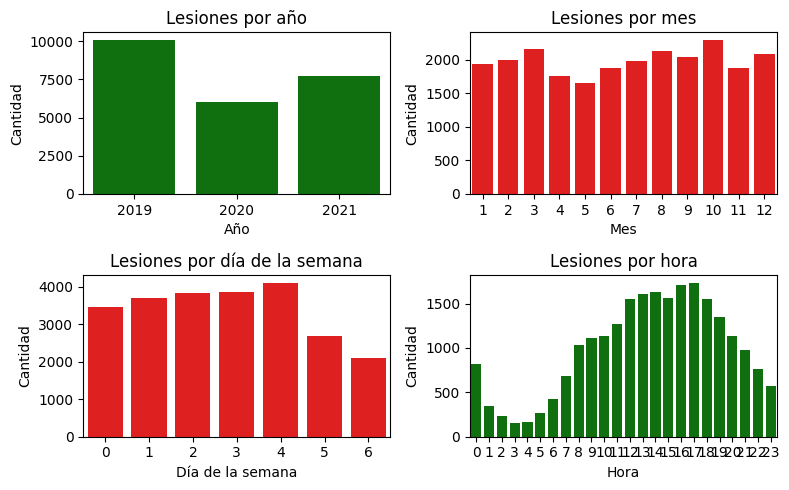

In [15]:
# subplots de los años, meses, dias de las lesiones

# Creamos el gráfico
plt.figure(figsize=(8, 5))

# Subplot 1: Count plot para los meses de la columna FECHA
plt.subplot(2, 2, 1)
sns.countplot(x=df_les['FECHA'].dt.year,color="green")
plt.title('Lesiones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

# Subplot 2: Count plot para los días de la semana de la columna FECHA
plt.subplot(2, 2, 2)
sns.countplot(x=df_les['FECHA'].dt.month,color="red")
plt.title('Lesiones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

# Subplot 3: Count plot para las horas de la columna HORA
plt.subplot(2, 2, 3)
sns.countplot(x=df_les['FECHA'].dt.dayofweek,color="red")
plt.title('Lesiones por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# Subplot 4: Count plot para los años de la columna FECHA
plt.subplot(2, 2, 4)
sns.countplot(x=df_les['HORA'],color="green")
plt.title('Lesiones por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostramos el gráfico
plt.show()


## Nos concentramos en "df_vic_les"

In [16]:
# Cambiamos de formato a las columnas del df_hom_vic
df_les_vic['FECHA'] = df_les_vic['FECHA'].astype('datetime64[ns]')
df_les_vic['ROL_VICTIMA'] = df_les_vic['ROL_VICTIMA'].astype('category')
df_les_vic['SEXO_VICTIMA'] = df_les_vic['SEXO_VICTIMA'].astype('category')
df_les_vic['RANGO_ETARIO'] = df_les_vic['RANGO_ETARIO'].astype('category')


In [17]:
df_les_vic.columns

Index(['ID_HECHO', 'FECHA', 'VEHICULO_VICTIMA', 'SEXO_VICTIMA', 'EDAD_VICTIMA',
       'GRAVEDAD', 'ROL_VICTIMA', 'RANGO_ETARIO'],
      dtype='object')

## Análisis de Frecuencia de Datos Categóricos 


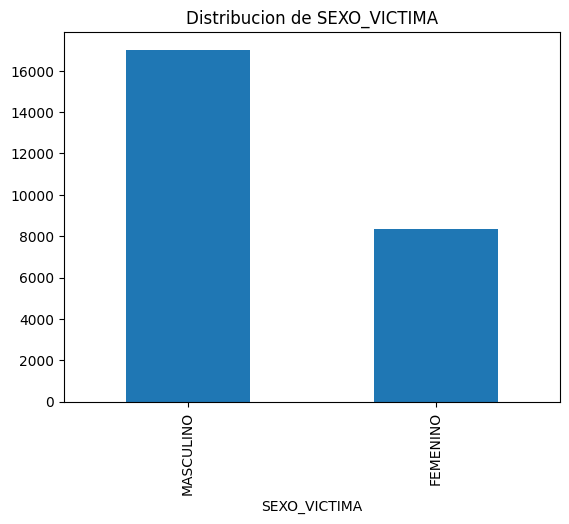

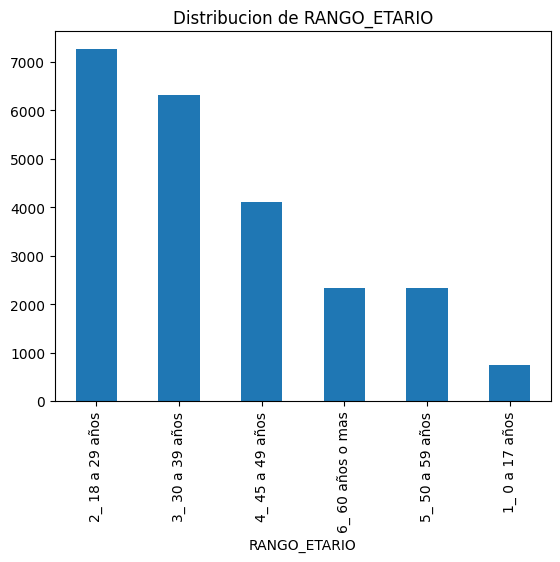

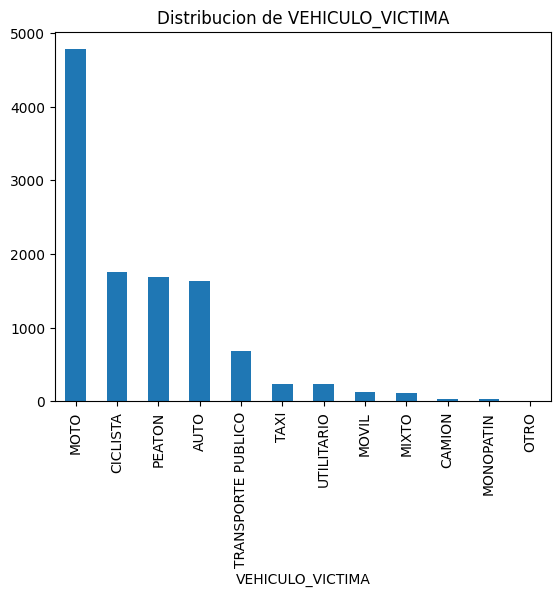

In [18]:
columnas4=["SEXO_VICTIMA","RANGO_ETARIO","VEHICULO_VICTIMA"]#"ROL_VICTIMA"

# Observamos las frecuencias de los datos categoricos de la primera tabla df_les_vic
for col in columnas4:
    df_les_vic[col].value_counts().plot(kind='bar',title="Distribucion de "+str(col))
    plt.show()